In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [22]:
#loaded Data
file_path = '../data/raw/raw_analyst_ratings.csv'

df = pd.read_csv(file_path)
# Preview the data
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [23]:
#get info about the data
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [24]:
# check for null
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [25]:
# get headlines and their counts
# Count the occurrences of each headline
headline_counts = df['headline'].value_counts()

print(headline_counts)

headline
Benzinga's Top Upgrades                                                                             5449
Benzinga's Top Downgrades                                                                           5372
Benzinga's Top Initiations                                                                          4241
Stocks That Hit 52-Week Lows On Thursday                                                            3962
Morning Market Losers                                                                               3440
                                                                                                    ... 
China Zenix Auto Wins Supply Contract With Cargotec to Supply Tubeless Steel Wheels                    1
China Zenix Auto Awarded Supply Contract With FAW                                                      1
Zenix Auto Developing Aluminum Wheel For Yutong's New Energy Bus                                       1
China Zenix Auto International Announces Crowe

In [26]:

print(df['stock'].value_counts())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


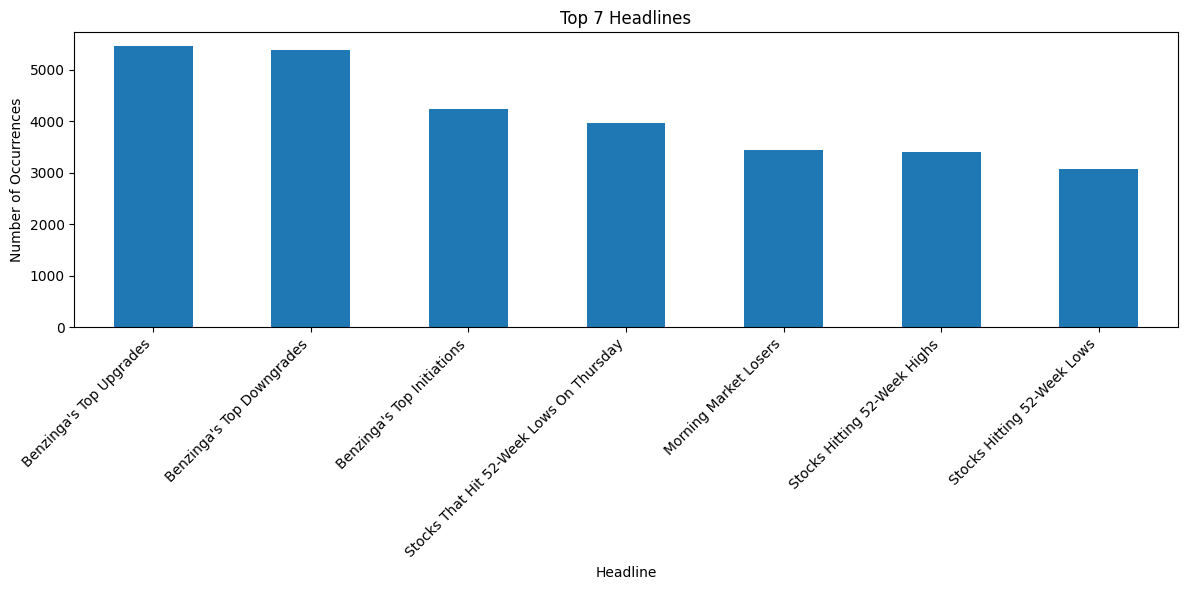

In [27]:
# Get the top 7 headlines
top_7_headlines = headline_counts.head(7)

# Create a bar chart for the top 7 headlines
plt.figure(figsize=(12, 6))
top_7_headlines.plot(kind='bar')
plt.title('Top 7 Headlines')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

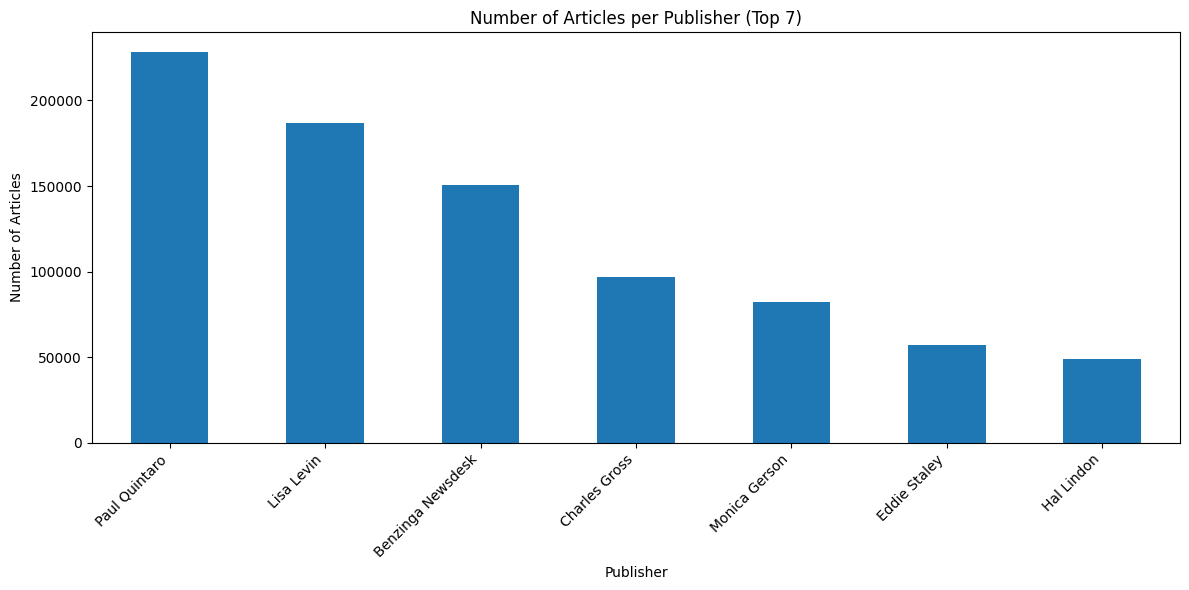

In [28]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Get the top 7 publishers
top_7_publishers = publisher_counts.head(7)

# Create a bar chart for the top 7
plt.figure(figsize=(12, 6))
top_7_publishers.plot(kind='bar')
plt.title('Number of Articles per Publisher (Top 7)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


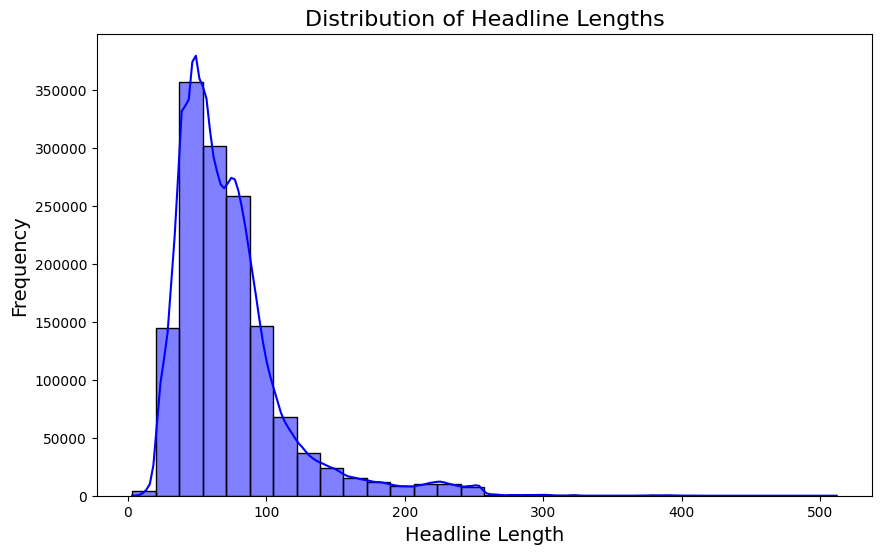

In [30]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(len)

# Compute statistics for headline lengths
length_stats = df['headline_length'].describe()
print(length_stats)

# Plot distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenize and filter stop words
df['tokens'] = df['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Flatten tokens for analysis
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Headlines', fontsize=16)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\helin/nltk_data'
    - 'c:\\Users\\helin\\financial-news-sentiment\\.venv\\nltk_data'
    - 'c:\\Users\\helin\\financial-news-sentiment\\.venv\\share\\nltk_data'
    - 'c:\\Users\\helin\\financial-news-sentiment\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\helin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
